In [4]:
import pandas as pd
import seaborn as sns

Reading Dataset

In [5]:
df = pd.read_csv("D:\Datathon\Bank Account Fraud.csv")

In [3]:
df.head()

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
0,0,0.3,0.986506,-1,25,40,0.006735,102.453711,AA,1059,...,0,1500,0,INTERNET,16.224843,linux,1,1,0,0
1,0,0.8,0.617426,-1,89,20,0.010095,-0.849551,AD,1658,...,0,1500,0,INTERNET,3.363854,other,1,1,0,0
2,0,0.8,0.996707,9,14,40,0.012316,-1.490386,AB,1095,...,0,200,0,INTERNET,22.730559,windows,0,1,0,0
3,0,0.6,0.475100,11,14,30,0.006991,-1.863101,AB,3483,...,0,200,0,INTERNET,15.215816,linux,1,1,0,0
4,0,0.9,0.842307,-1,29,40,5.742626,47.152498,AA,2339,...,0,200,0,INTERNET,3.743048,other,0,1,0,0


In [4]:
df.columns

Index(['fraud_bool', 'income', 'name_email_similarity',
       'prev_address_months_count', 'current_address_months_count',
       'customer_age', 'days_since_request', 'intended_balcon_amount',
       'payment_type', 'zip_count_4w', 'velocity_6h', 'velocity_24h',
       'velocity_4w', 'bank_branch_count_8w',
       'date_of_birth_distinct_emails_4w', 'employment_status',
       'credit_risk_score', 'email_is_free', 'housing_status',
       'phone_home_valid', 'phone_mobile_valid', 'bank_months_count',
       'has_other_cards', 'proposed_credit_limit', 'foreign_request', 'source',
       'session_length_in_minutes', 'device_os', 'keep_alive_session',
       'device_distinct_emails_8w', 'device_fraud_count', 'month'],
      dtype='object')

In [5]:
df.isnull().sum()

fraud_bool                          0
income                              0
name_email_similarity               0
prev_address_months_count           0
current_address_months_count        0
customer_age                        0
days_since_request                  0
intended_balcon_amount              0
payment_type                        0
zip_count_4w                        0
velocity_6h                         0
velocity_24h                        0
velocity_4w                         0
bank_branch_count_8w                0
date_of_birth_distinct_emails_4w    0
employment_status                   0
credit_risk_score                   0
email_is_free                       0
housing_status                      0
phone_home_valid                    0
phone_mobile_valid                  0
bank_months_count                   0
has_other_cards                     0
proposed_credit_limit               0
foreign_request                     0
source                              0
session_leng

No Null Values, Now checking missing values which are given as -1 for few columns

In [10]:
(df == -1).sum()

fraud_bool                               0
income                                   0
name_email_similarity                    0
prev_address_months_count           712920
current_address_months_count          4254
customer_age                             0
days_since_request                       0
intended_balcon_amount                   0
payment_type                             0
zip_count_4w                             0
velocity_6h                              0
velocity_24h                             0
velocity_4w                              0
bank_branch_count_8w                     0
date_of_birth_distinct_emails_4w         0
employment_status                        0
credit_risk_score                      488
email_is_free                            0
housing_status                           0
phone_home_valid                         0
phone_mobile_valid                       0
bank_months_count                   253635
has_other_cards                          0
proposed_cr

In [6]:
from sklearn.impute import SimpleImputer

# Drop the columns 'prev_address_months_count' and 'current_address_months_count' as most of it has missing values
df.drop(["prev_address_months_count", "current_address_months_count"], axis='columns', inplace=True)


# Replace missing values marked as -1 with NaN in 'session_length_in_minutes' and then with mean
df['session_length_in_minutes'].replace(-1, float('nan'), inplace=True)
imputer = SimpleImputer(strategy='mean')
df['session_length_in_minutes'] = imputer.fit_transform(df[['session_length_in_minutes']])

# Replace missing values with the mean
df['bank_months_count'].replace(-1, float('nan'), inplace=True)
df['device_distinct_emails_8w'] = imputer.fit_transform(df[['device_distinct_emails_8w']])
df['bank_months_count'] = imputer.fit_transform(df[['bank_months_count']])


# Remove rows where 'device_distinct_emails_8w' is -1
df = df[df['device_distinct_emails_8w']!=-1]

#Note that credit risk score doesn't have missing values as -1 as its range is (-191,389)

In [7]:
(df == -1).sum()

fraud_bool                            0
income                                0
name_email_similarity                 0
customer_age                          0
days_since_request                    0
intended_balcon_amount                0
payment_type                          0
zip_count_4w                          0
velocity_6h                           0
velocity_24h                          0
velocity_4w                           0
bank_branch_count_8w                  0
date_of_birth_distinct_emails_4w      0
employment_status                     0
credit_risk_score                   487
email_is_free                         0
housing_status                        0
phone_home_valid                      0
phone_mobile_valid                    0
bank_months_count                     0
has_other_cards                       0
proposed_credit_limit                 0
foreign_request                       0
source                                0
session_length_in_minutes             0


Using One Hot Encoding to convert Categorical Data

In [8]:
X = df.drop("fraud_bool", axis="columns")
X_encoded = pd.get_dummies(X, columns=['payment_type','employment_status','housing_status','source','device_os'])
Y=df['fraud_bool']

In [9]:
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest

# Initialize SelectKBest with the ANOVA F-test scoring function
#Setting k=18 to get 18 features
k_best = SelectKBest(score_func=f_classif, k=20)

k_best.fit(X_encoded, Y)

selected_indices = k_best.get_support(indices=True)

selected_features = X_encoded.columns[selected_indices]

print("Selected Features:")
print(selected_features)


# Calculate F-test scores and p-values for each feature
f_test_scores, p_values = f_classif(X_encoded, Y)

feature_stats = pd.DataFrame({'Feature': X_encoded.columns, 'F-test Score': f_test_scores, 'p-value': p_values})
feature_stats = feature_stats.sort_values(by='F-test Score', ascending=False)

print(feature_stats)


c:\Python39\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:110: UserWarning: Features [22] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
c:\Python39\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:111: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


Selected Features:
Index(['income', 'name_email_similarity', 'customer_age',
       'date_of_birth_distinct_emails_4w', 'credit_risk_score',
       'email_is_free', 'phone_home_valid', 'has_other_cards',
       'proposed_credit_limit', 'keep_alive_session',
       'device_distinct_emails_8w', 'payment_type_AA', 'payment_type_AC',
       'housing_status_BA', 'housing_status_BB', 'housing_status_BC',
       'housing_status_BE', 'device_os_linux', 'device_os_other',
       'device_os_windows'],
      dtype='object')
                             Feature  F-test Score        p-value
36                 housing_status_BA  13259.314384   0.000000e+00
48                 device_os_windows   6158.089572   0.000000e+00
11                 credit_risk_score   5011.155302   0.000000e+00
17             proposed_credit_limit   4770.256718   0.000000e+00
2                       customer_age   3976.311191   0.000000e+00
20                keep_alive_session   2536.933233   0.000000e+00
0                  

c:\Python39\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:110: UserWarning: Features [22] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
c:\Python39\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:111: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


Selecting these 18 features based on FTest and p values

In [10]:
X_features = X_encoded[['income', 'name_email_similarity', 'customer_age',
       'date_of_birth_distinct_emails_4w', 'credit_risk_score',
       'email_is_free', 'phone_home_valid', 'has_other_cards',
       'proposed_credit_limit', 'keep_alive_session',
       'device_distinct_emails_8w', 'payment_type_AA', 'payment_type_AC',
       'housing_status_BA', 'housing_status_BB', 'housing_status_BC',
       'housing_status_BE', 'device_os_linux', 'device_os_other',
       'device_os_windows']]

Using SMOTE(Synthetic Minority Oversampling Technique) to increase the number of fraud transaction data as the data is imbalanced

In [11]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_resampled, y_resampled = smote.fit_resample(X_features, Y)

In [13]:
fraud_counts = y_resampled.value_counts()

# Print the counts
print("Number of rows with fraud_bool value 0:", fraud_counts[0])
print("Number of rows with fraud_bool value 1:", fraud_counts[1])

Number of rows with fraud_bool value 0: 988616
Number of rows with fraud_bool value 1: 988616


Total data of 1988232 where both fraud and legitimate transactions are of 988616

Splitting the data in 80-20 ratio

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test= train_test_split(X_resampled,y_resampled,test_size=0.2)

In [34]:
fraud_counts = Y_test.value_counts()

# Print the counts
print("Number of rows with fraud_bool value 0:", fraud_counts[0])
print("Number of rows with fraud_bool value 1:", fraud_counts[1])

Number of rows with fraud_bool value 0: 197587
Number of rows with fraud_bool value 1: 197860


Function for evaluating the performance

In [15]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, accuracy_score
import matplotlib.pyplot as plt

def get_evaluation_metrics(true_labels, predicted_labels, plot_roc_curve=False):
    confusion_mat = confusion_matrix(true_labels, predicted_labels)
    print("Confusion Matrix:")
    print(confusion_mat)
    
    # Plot Confusion Matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion_mat, annot=True, cmap='Blues', fmt='g')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()
    
    # Extract True Positive, False Positive, True Negative, and False Negative counts
    tn, fp, fn, tp = confusion_mat.ravel()
    print("True Positives:", tp)
    print("False Positives:", fp)
    print("True Negatives:", tn)
    print("False Negatives:",fn)
    
    # Precision
    precision = precision_score(true_labels, predicted_labels)
    print("Precision:", precision)
    
    # Recall
    recall = recall_score(true_labels, predicted_labels)
    print("Recall:", recall)
    
    # F1 Score
    f1 = f1_score(true_labels, predicted_labels)
    print("F1 Score:", f1)
    
    accuracy = accuracy_score(true_labels, predicted_labels)
    print("Accuracy:",accuracy)
    
    # AUC-ROC Score
    auc_roc = roc_auc_score(true_labels, predicted_labels)
    print("AUC-ROC Score:", auc_roc)
    
    # Plot ROC Curve if requested
    if plot_roc_curve:
        fpr, tpr, _ = roc_curve(true_labels, predicted_labels)
        plt.figure(figsize=(8, 6))
        plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % auc_roc)
        plt.plot([0, 1], [0, 1], color='red', linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic (ROC) Curve')
        plt.legend(loc="lower right")
        plt.show()


1. Decision Tree Classifier

In [24]:
#Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier(max_depth=4)
classifier.fit(X_train, Y_train)
y_pred_dt=classifier.predict(X_test)

Confusion Matrix:
[[175480  22107]
 [ 41989 155871]]


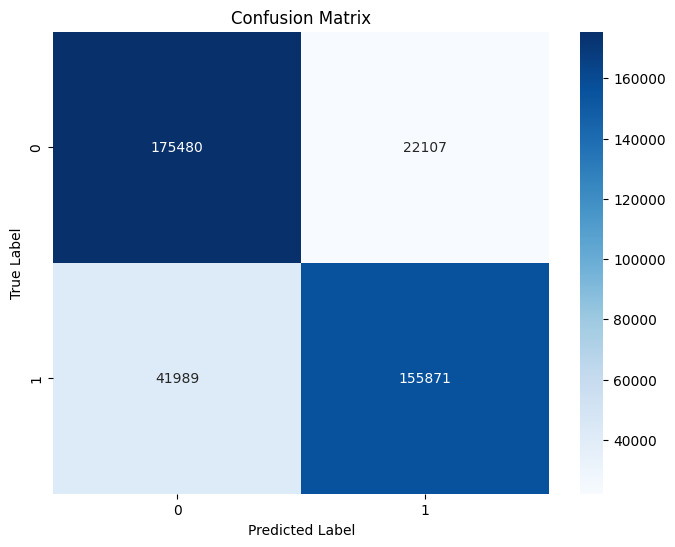

True Positives: 155871
False Positives: 22107
True Negatives: 175480
False Negatives: 41989
Precision: 0.8757880187438897
Recall: 0.7877842919235823
F1 Score: 0.8294584368797194
Accuracy: 0.8379150682645209
AUC-ROC Score: 0.8379497003555519


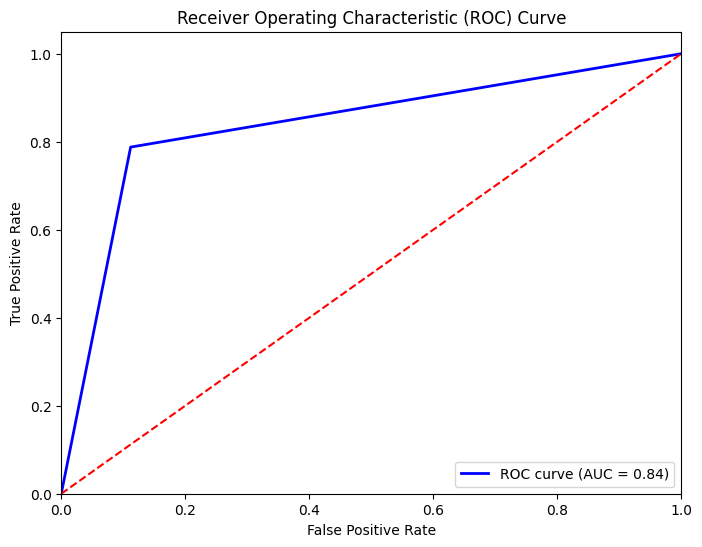

In [37]:
get_evaluation_metrics(Y_test, y_pred_dt, plot_roc_curve=True)

2. Random Forest Classifier

In [25]:
from sklearn.ensemble import RandomForestClassifier

classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5,
                                       n_estimators=100, oob_score=True)

classifier_rf.fit(X_train, Y_train)
y_pred_rf = classifier_rf.predict(X_test)

Confusion Matrix:
[[178324  19263]
 [ 13656 184204]]


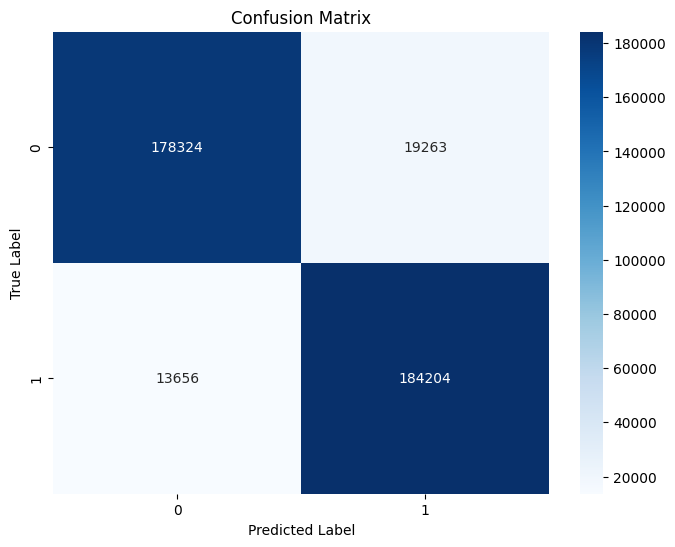

True Positives: 184204
False Positives: 19263
True Negatives: 178324
False Negatives: 13656
Precision: 0.9053261708286847
Recall: 0.9309815020721722
F1 Score: 0.9179746192008014
Accuracy: 0.9167549633705655
AUC-ROC Score: 0.916745135180792


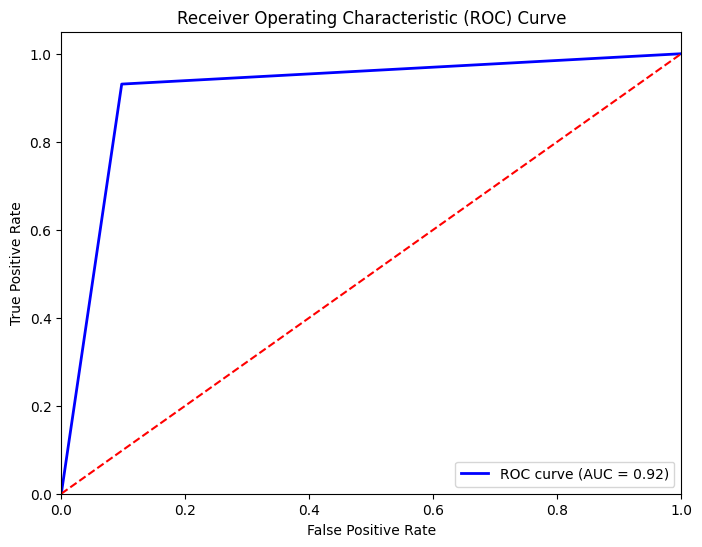

In [39]:
get_evaluation_metrics(Y_test, y_pred_rf, plot_roc_curve=True)

In [51]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


LightGBM (Gradient Boosting Model)

In [21]:
import lightgbm as lgb
lgb_classifier = lgb.LGBMClassifier(num_leaves=31, learning_rate=0.1, n_estimators=100)
lgb_classifier.fit(X_train, Y_train)
y_pred_lgb = lgb_classifier.predict(X_test)

[LightGBM] [Info] Number of positive: 790876, number of negative: 790909
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.063390 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1214
[LightGBM] [Info] Number of data points in the train set: 1581785, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499990 -> initscore=-0.000042
[LightGBM] [Info] Start training from score -0.000042


Confusion Matrix:
[[193224   4363]
 [  5905 191955]]


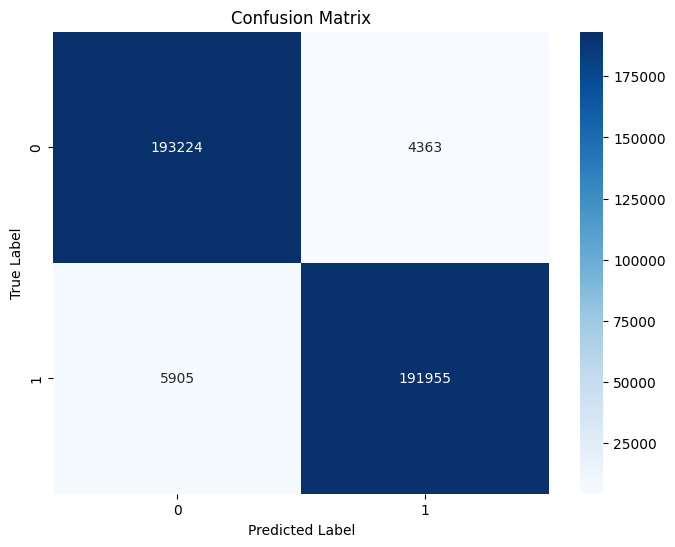

True Positives: 191955
False Positives: 4363
True Negatives: 193224
False Negatives: 5905
Precision: 0.9777758534622398
Recall: 0.970155665622157
F1 Score: 0.9739508546900132
Accuracy: 0.974034447094048
AUC-ROC Score: 0.9740371266917488


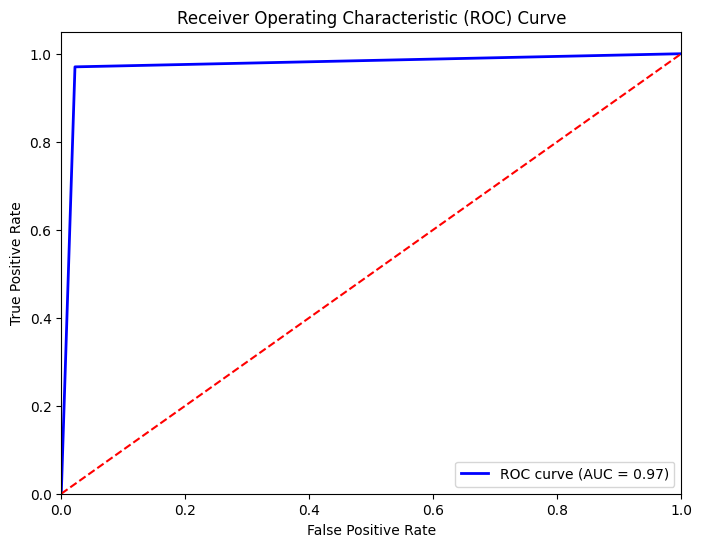

In [41]:
get_evaluation_metrics(Y_test, y_pred_lgb, plot_roc_curve=True)

XGBoost Classifier

In [17]:
import xgboost as xgb
model = xgb.XGBClassifier()

model.fit(X_train, Y_train)
y_pred = model.predict(X_test)

Confusion Matrix:
[[194258   3874]
 [  4749 192566]]


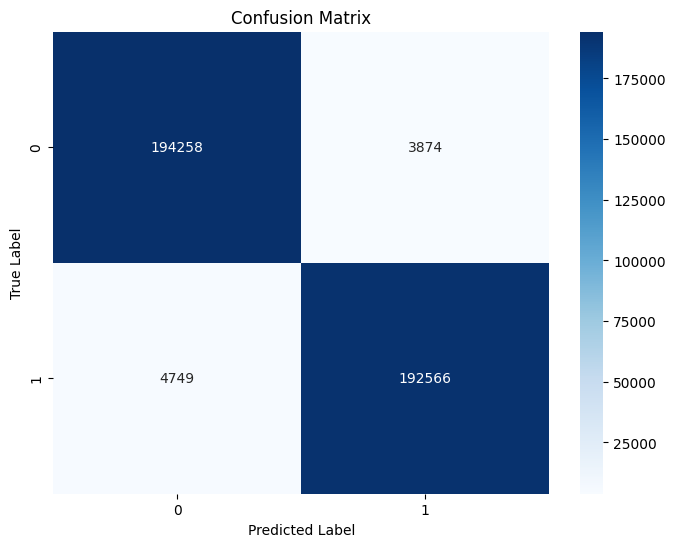

True Positives: 192566
False Positives: 3874
True Negatives: 194258
False Negatives: 4749
Precision: 0.9802789655874568
Recall: 0.9759318855636926
F1 Score: 0.978100595547993
Accuracy: 0.9781942965808313
AUC-ROC Score: 0.978189632039513


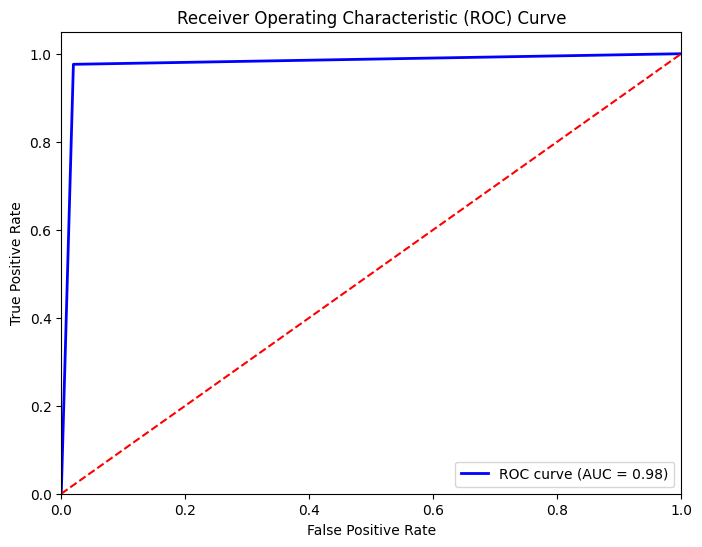

In [55]:
get_evaluation_metrics(Y_test, y_pred, plot_roc_curve=True)

In [27]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Assuming y_true is the true labels for all models

# Create a dictionary to store the predicted values for each model
y_pred_dict = {'XGBoost': y_pred,'LightGBM': y_pred_lgb, 'Random Forest':y_pred_rf,'Decision Tree':y_pred_dt}

# Define a list to store the evaluation metrics for each model
evaluation_results = []

# Iterate over each model's predicted values
for model_name, y_pred in y_pred_dict.items():
    # Calculate precision, recall, and F1 score
    precision = precision_score(Y_test, y_pred)
    recall = recall_score(Y_test, y_pred)
    f1 = f1_score(Y_test, y_pred)
    
    # Append the evaluation metrics to the results list
    evaluation_results.append({'Model': model_name, 'Precision': precision, 'Recall': recall, 'F1 Score': f1})

# Convert the results list to a DataFrame for easier visualization
results_df = pd.DataFrame(evaluation_results)

# Display the evaluation results
print(results_df)


           Model  Precision    Recall  F1 Score
0        XGBoost   0.876002  0.787387  0.829334
1       LightGBM   0.978374  0.970522  0.974432
2  Random Forest   0.905961  0.930646  0.918138
3  Decision Tree   0.876002  0.787387  0.829334


In [38]:
test = pd.read_csv("D:/test fraud.csv")
test_encoded = pd.get_dummies(test, columns=['payment_type','employment_status','housing_status','source','device_os'])
test_features = test_encoded[['income', 'name_email_similarity', 'customer_age',
       'date_of_birth_distinct_emails_4w', 'credit_risk_score',
       'email_is_free', 'phone_home_valid', 'has_other_cards',
       'proposed_credit_limit', 'keep_alive_session',
       'device_distinct_emails_8w', 'payment_type_AA', 'payment_type_AC',
       'housing_status_BA', 'housing_status_BB', 'housing_status_BC',
       'housing_status_BE', 'device_os_linux', 'device_os_other',
       'device_os_windows']]

test_pred = model.predict(test_features)

In [39]:
total_fraud_count = sum(test_pred == 1)
print("Total Fraud Detected: " , total_fraud_count)

Total Fraud Detected:  8
